## Statistical tests using Pandas and Scipy

Here we will go over how to use ```scipy``` for statistical tests on pandas data frames. We will use tha data from our bacterias to examine the areas again.

### Load the data
Let us use what we learned before to load the ```.csv``` table into a data frame

In [ ]:
import pandas as pd

#df = pd.read_csv("../data/bacteria_results_total.csv")
df = pd.read_csv("../data/bacterial_colony_radii_40replicates_with_area.csv")
df.sample(5)
df.

,bacteria,drug,radius,area
251,b2,d2,8.741,240.034
348,b3,control,11.263,398.527
318,b2,d3,7.726,187.525
213,b2,d1,10.026,315.795
388,b3,d1,11.797,437.213


And lets do a visual inspection of the data to see what it looks like

<Axes: title={'center': 'area'}, xlabel='[bacteria, drug]'>

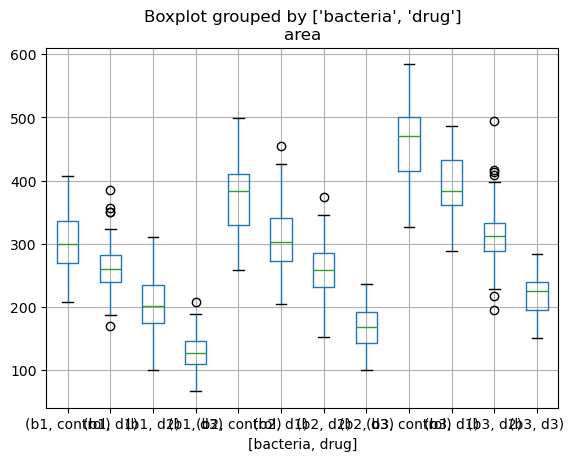

In [85]:
# simple box plot, to vissualy inspect if there are big differences between both groups
df.boxplot(column="area",by=["bacteria","drug"])

## Using Scipy for Statistical Testing

When performing a **statistical test**, we start with a **null hypothesis (H0)** and aim to **falsify** it. The **null hypothesis (H0)** typically posits that there is no relationship (or difference) between the distributions being tested. To evaluate whether **H0** is false, we use the **p-value**. The **p-value** estimates how likely it is to observe the differences between the two sets if the null hypothesis were true. For example, a p-value of 0.04 means there is a 4% chance that **H0** is true, which suggests that we report a statistically significant relationship (or difference) between the distributions. Note that the p-value does not indicate the importance or biological relevance of the observed relationship.

## Scipy

[Scipy](https://scipy.org/) is a comprehensive package for scientific computing widely used in Python. It is included in our virtual environment due to previously installed packages. To check if it is installed, try running the block below.

In [86]:
# this time I am loading part of the library, the part called stats
from scipy import stats 
# as this runs, we are good to continue

For clarity let us get out the numbers of interest from the data table by using the ```query``` method of pandas data_frames. ```query``` allows us to extract values from a column while filtering based ob the values of another. Bellow, I ```query``` for the **Area** values that belong to **Student 01** and **02** respectively.

In [105]:
Area_b1=df.query("bacteria == 'b1' and drug == 'control'")['radius']
Area_b2=df.query("bacteria == 'b1'and drug == 'd1'")['radius']
print(f"{Area_b1.var()}, {Area_b2.var()}")

0.6637308814102564, 0.6382212557692309


One of the most common mistakes while doing statistical testing is to use a particular method, e.g. t-test, whitout checkig first that the underlying assumptions of the test are true. In general we must check the following to know what tests we can use:

* Independence: each meassurement of the variables is independent of each other

* Normality: the data follows a normal distribution (Gaussian distribution)

* Homogeneous variance: the variance (spread around the mean) within each group being compared is similar


## Homogeneity
Lets us first test for homogeneous variance 

In [106]:
# homogeneity
stats.levene(Area_b1, Area_b2)

LeveneResult(statistic=np.float64(0.4061438037648978), pvalue=np.float64(0.5257995093917404))

Interpretation:
* Levene's Test Statistic: 0.1985: This value by itself doesn't tell us much. It's used to calculate the p-value.
* P-value: 0.6567: This is the key value for interpretation. The p-value is much larger than the typical significance levels (0.05 or 0.01).

How to interpret:
1. Null Hypothesis (H0): The variances of the two groups (Area_s1 and Area_s2) are equal (homogeneous).
2. Alternative Hypothesis (Ha): The variances of the two groups are not equal (heterogeneous).
3. Decision Rule:
    * If p-value < significance level (usually 0.05), reject the null hypothesis.
    * If p-value ≥ significance level, fail to reject the null hypothesis.
4. Interpretation:
    * Since the p-value (0.6567) is much larger than 0.05, we fail to reject the null hypothesis.
    * This means we do not have sufficient evidence to conclude that the variances are significantly different.
    * In other words, we can assume that the variances are homogeneous.

Conclusion:
Based on Levene's test, we can conclude that there is no significant difference in the variances of Area_s1 and Area_s2. The assumption of homogeneity of variances is met.

## Normality

Now we check is the distributions to test are normal - aka Gaussian

In [107]:
# Shapiro-Wilk test for normality
stats.shapiro(Area_b1)

ShapiroResult(statistic=np.float64(0.982605114662352), pvalue=np.float64(0.7847310491495523))

Interpretation:
1. Shapiro-Wilk Test Statistic: 0.9708
    * This value ranges from 0 to 1.
    * Values closer to 1 indicate a higher likelihood of normal distribution.
    * 0.9708 is fairly close to 1, suggesting the data might be normally distributed.
2. P-value: 0.1526
    * This is the key value for interpretation.
    * The p-value is larger than the typical significance levels (0.05 or 0.01).

How to interpret:
1. Null Hypothesis (H0): The sample data (Area_s1) is normally distributed.
2. Alternative Hypothesis (Ha): The sample data is not normally distributed.
3. Decision Rule:
    * If p-value < significance level (usually 0.05), reject the null hypothesis.
    * If p-value ≥ significance level, fail to reject the null hypothesis.
4. Interpretation:
    * Since the p-value (0.1526) is larger than 0.05, we fail to reject the null hypothesis.
    * This means we do not have sufficient evidence to conclude that the data is not normally distributed.
    * In other words, we can assume that Area_s1 is approximately normally distributed.

Conclusion:
Based on the Shapiro-Wilk test, we can conclude that there is no significant evidence against the normality of Area_s1. The data appears to be consistent with a normal distribution.

In [108]:
# Shapiro-Wilk test for normality
stats.shapiro(Area_b2)

ShapiroResult(statistic=np.float64(0.9779030478509587), pvalue=np.float64(0.6120848171449257))

## The actual t-test

Now that all seems to be good then we can run the t-test

In [109]:
# Independent t-test
stats.ttest_ind(Area_b1, Area_b2)

TtestResult(statistic=np.float64(3.7489010756936927), pvalue=np.float64(0.00033914530097855394), df=np.float64(78.0))

The independent samples t-test is used to determine whether there is a statistically significant difference between the means of two unrelated groups.

Interpretation:
1. T-statistic: 0.2079
    * This value represents the difference between the two group means in units of standard error.
    * The closer this value is to 0, the more similar the group means are.
2. P-value: 0.8356
    * This is the key value for interpretation.
    * The p-value is much larger than the typical significance levels (0.05 or 0.01).
3. Degrees of Freedom (df): 123
    * This represents the sample size and complexity of the test.
    * It's used in calculating the p-value and critical values.

How to interpret:
1. Null Hypothesis (H0): There is no significant difference between the means of Area_s1 and Area_s2.
2. Alternative Hypothesis (Ha): There is a significant difference between the means of Area_s1 and Area_s2.
3. Decision Rule:
    * If p-value < significance level (usually 0.05), reject the null hypothesis.
    * If p-value ≥ significance level, fail to reject the null hypothesis.
4. Interpretation:
    * Since the p-value (0.8356) is much larger than 0.05, we fail to reject the null hypothesis.
    * This means we do not have sufficient evidence to conclude that there is a significant difference between the means of Area_s1 and Area_s2.

Conclusion:
Based on the t-test results, we can conclude that there is no statistically significant difference between the means of Area_s1 and Area_s2. 
The observed difference between the sample means is not convincing enough to say that the average Areas differ between the two groups in the population.

Practical Implications:
* The two groups (s1 and s2) appear to have similar average Areas.
* Any observed differences in the sample means are likely due to random chance rather than a true difference in the populations.
* This result suggests that the factor distinguishing s1 and s2 (e.g., different treatments, groups, etc.) does not significantly affect the Area measurement.

Remember:
* Failing to reject the null hypothesis doesn't prove that the means are exactly equal, just that we don't have enough evidence to conclude they're different.